# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**TEAM NM1**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [50]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd  # Data processing and manipulation 
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Statistical data visualization
import numpy as np  # Numerical operations and linear algebra 

# Libraries for data preparation and model building
from scipy.stats import norm  # Statistical functions
from sklearn.preprocessing import StandardScaler  # Data preprocessing
import warnings  # Warning handling
warnings.filterwarnings('ignore')  # Ignore warnings

# Display Matplotlib plots in Jupyter Notebook
%matplotlib inline  

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = '###'

pd.set_option('max_columns', 100)
pd.set_option('max_rows', 100)

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [51]:
df_train = pd.read_csv('df_train.csv') # load the train dataset, used the pandas read_csv() to import our dataset
df_test = pd.read_csv('df_test.csv') # load the test dataset, used the pandas read_csv() to import our dataset
#Preview the dataset


In [52]:
df_train.head() 

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [53]:
df_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,NaN,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,NaN,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,sp25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,NaN,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,sp25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,NaN,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,sp25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,NaN,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


We need to concatenate the two dataset for better predictability and also for the two dataset to be well alligned 

In [54]:
df = pd.concat([df_train,df_test])
df.tail()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,0.0,70.000000,6.333333,320.000000,0.0,2.000000,0.0,sp24,0.0,0.0,1029.666667,0.0,0.0,0.0,0.0,800.0,800.0,1034.666667,800.0,NaN,280.816667,1031.666667,279.816667,279.323333,734.333333,280.210000,69.666667,278.816667,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000,NaN
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,0.0,36.666667,2.666667,293.333333,0.0,4.000000,0.0,sp24,0.0,0.0,1028.666667,0.0,0.0,0.0,0.0,800.0,800.0,1034.333333,800.0,NaN,287.483333,1031.333333,290.816667,290.323333,747.666667,287.280000,32.000000,289.816667,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333,NaN
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,0.0,14.666667,2.666667,233.333333,0.0,4.666667,0.0,sp23,0.0,0.0,1027.000000,0.0,0.0,0.0,0.0,800.0,800.0,1033.000000,800.0,NaN,290.816667,1030.000000,293.483333,293.483333,800.000000,290.816667,23.666667,293.483333,289.483333,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333,NaN
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,0.0,19.000000,2.333333,253.333333,0.0,3.333333,0.0,sp23,0.0,0.0,1027.000000,0.0,0.0,0.0,0.0,800.0,800.0,1033.333333,800.0,NaN,288.816667,1030.333333,286.483333,285.976667,800.000000,288.300000,59.000000,285.483333,285.816667,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000,NaN
2919,11682,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,0.0,120.000000,4.666667,310.000000,0.0,3.666667,0.0,sp23,0.0,0.0,1028.000000,0.0,0.0,0.0,0.0,800.0,800.0,1034.000000,800.0,NaN,284.816667,1030.666667,281.150000,280.313333,800.000000,284.423333,79.000000,279.483333,283.816667,276.816667,281.133333,276.150000,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333,NaN


Aftr the concantenate process, we would notice we have some null values within the target variable. This is due the diffrence in row values between the train and test dataset, all of this will bbe corrected for later on in the model fitting phase

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


<b>Check the shape of the dataset</b>
- It is a good practise to first check the sape of the dataset so as to get a general overview of what our dataset is about

In [55]:
# print the shape
shape = df.shape
print('The shape of the dataset: ', shape)

The shape of the dataset:  (11683, 49)


Now we can see that the dataset contains <b>11683 instances </b>,  <b>48 variables</b> and <b>1 target</b> 
NB: The unnamed intial column contains the ID number of each observation which is negligible .

<b>Summary of the Dataset</b>

<b>Dataset description</b>
- The dataset contains several columns which holds data about the environmental atmospheric conditions of different cities within Spain; <b>(Madrid, Valencia, Seville, Bilbao and Barcelona)</b>.
- Showing the data repressentations of various weather and atmospheric conditions such as <b>Cloud, humidity, wind, rainfall, snow, temparature and pressure</b>
- It also contains both numerical and categorical data with data types ranging between float, integer and object data types.
- The first column without variable name is the observation_ID

<b>Important Points and Variable description of the Dataset</b><br>
<b>Features</b>
- time: Time at which the data was recorded
- {City Name}_wind_speed: The wind speed at a specific time interval for the named city.
- {City Name}_wind_degree: The strength of the wind for the named city at a specific time interval - expressed as a category.
- {City Name}_rain_1h: A metric expressing the amount of rain that has fallen in the past hour in a particular city.
- {City Name}_rain_3h:A metric expressing the amount of rain that has fallen in the past three hours in a particular city.
- {City Name}_humidity: The level of humidity as measured at the defined time for the specific city mentioned.
- {City Name}_clouds_all: The level of cloud coverage as measured at the specified point in time for the specific city mentioned.
- {City Name}_pressure: The atmospheric pressure for the named city at a specific time interval - expressed as a category.
- {City Name}_snow_3h: A metric expressing the amount of snow that has fallen in the past three hours in a particular city.
- {City Name}_weather_id: A metric used to explain the weather condition of a specific city at a specified time.
- {City Name}_temp_max: The maximum temperature for a specific city at a point in time.
- {City Name}_temp_min: The minimum temperature for a specific city at a point in time.
- {City Name}_temp: The average temperature for a specific city at a point in time.<br>

<b>Target Variable</b>
- load_shortfall_3h: The difference between the energy generated by the method of renewable energy sources, such as solar, wind, geothermal, etc., and energy generated with fossil fuels - partitioned in three-hour windows.

<b>Statiscal Properties of the Dataset</b>

In [56]:
# Statiscal Properties of the Dataset which helps us to view the Statiscal Properties of numerical variables in the dataset, it excludes character variables
df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,1.168300e+04,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,9161.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,8763.000000
mean,5841.000000,2.433750,0.118698,2.692873,63.774687,58.721818,43.440712,1.958629,14.155268,159.878855,2.782419,187.654241,20.668692,2.483067,0.108534,0.041120,0.023936,1.287326e+03,0.000182,0.043328,0.000331,0.000154,769.851665,764.603446,1017.482011,774.050843,1012.346687,296.007363,1011.797412,291.362722,290.788513,727.800750,293.170948,65.091814,290.229939,291.042128,289.377372,289.869413,284.993657,286.447784,288.616766,288.095397,291.263219,288.282055,287.056222,10673.857612
std,3372.735932,1.831762,0.334918,2.321759,22.219380,24.390621,32.046215,1.696043,24.541321,101.005654,1.758587,88.694717,28.478087,1.705508,0.556794,0.180425,0.482817,1.218906e+04,0.003171,0.163996,0.003466,0.010277,81.914258,90.736191,9.753552,72.909418,8.817473,8.929160,19.983122,7.441278,7.157835,113.616789,7.998774,19.040927,7.003619,7.236360,9.594562,6.680538,6.730076,6.738466,6.391989,6.898601,8.136234,9.258559,9.093455,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2920.500000,1.000000,0.000000,1.000000,46.333333,38.000000,12.000000,1.000000,0.000000,76.666667,1.333333,116.666667,0.000000,1.000000,0.000000,0.000000,0.000000,1.013667e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.333333,800.000000,1010.666667,289.483333,1012.666667,285.783333,285.395500,701.000000,287.403167,51.333333,284.928833,285.338609,282.150000,284.816667,280.122526,281.483448,284.150000,283.150000,285.483333,281.250000,280.150000,7390.333333
50%,5841.000000,2.000000,0.000000,2.000000,67.000000,59.333333,45.000000,1.333333,0.000000,145.666667,2.333333,193.333333,0.000000,2.000000,0.000000,0.000000,0.000000,1.017333e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1018.666667,800.000000,1015.000000,295.483333,1017.333333,291.150000,290.483333,800.000000,292.470000,66.333333,289.820000,290.150000,287.843333,289.426667,284.816667,286.193333,288.276333,287.816667,290.382000,286.923333,285.816667,11114.666667
75%,8761.500000,3.333333,0.100000,3.666667,83.000000,80.000000,75.000000,2.666667,20.000000,233.333333,3.666667,260.000000,38.333333,3.333333,0.000000,0.000000,0.000000,1.021167e+03,0.000000,0.000000,0.000000,0.000000,800.666667,801.000000,1023.333333

In [57]:
df.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

# Data Cleaning

In [58]:
df_clean = df
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            11683 non-null  int64  
 1   time                  11683 non-null  object 
 2   Madrid_wind_speed     11683 non-null  float64
 3   Valencia_wind_deg     11683 non-null  object 
 4   Bilbao_rain_1h        11683 non-null  float64
 5   Valencia_wind_speed   11683 non-null  float64
 6   Seville_humidity      11683 non-null  float64
 7   Madrid_humidity       11683 non-null  float64
 8   Bilbao_clouds_all     11683 non-null  float64
 9   Bilbao_wind_speed     11683 non-null  float64
 10  Seville_clouds_all    11683 non-null  float64
 11  Bilbao_wind_deg       11683 non-null  float64
 12  Barcelona_wind_speed  11683 non-null  float64
 13  Barcelona_wind_deg    11683 non-null  float64
 14  Madrid_clouds_all     11683 non-null  float64
 15  Seville_wind_speed  

<b>Check for Duplicated variables and instances</b>
- Check through th columns to remove variables with repeating row values. The code retains the first occurence of the variables
- Next cell checks for duplicated values in observation

In [59]:
# Create a set to keep track of seen column values
seen_values = set()

# Create a list to store columns to keep
columns_to_keep = []

for column in df.columns:
    column_values = df[column].values
    column_tuple = tuple(column_values)

    if column_tuple not in seen_values:
        seen_values.add(column_tuple)
        columns_to_keep.append(column)

# Create a new DataFrame with only the columns to keep
df_clean = df[columns_to_keep]

In [60]:
df_clean.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2915    False
2916    False
2917    False
2918    False
2919    False
Length: 11683, dtype: bool

In [61]:
df_clean.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [62]:
df_clean.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

- Correcting for missing values in the predictor variables
- Converting the variables into numeric data types

In [63]:
df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode()[0])

In [64]:
df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\d+)')
df_clean['Valencia_wind_deg'] = pd.to_numeric(df_clean['Valencia_wind_deg'])
df_clean['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
        ..
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 11683, dtype: int64

In [65]:
df_clean['Seville_pressure'] = df_clean['Seville_pressure'].str.extract('(\d+)')
df_clean['Seville_pressure'] = pd.to_numeric(df_clean['Seville_pressure'])
df_clean['Seville_pressure']

0       25
1       25
2       25
3       25
4       25
        ..
2915    24
2916    24
2917    23
2918    23
2919    23
Name: Seville_pressure, Length: 11683, dtype: int64

In [66]:
df_clean['time'] = pd.to_datetime(df_clean['time'])
df_clean['Year'] = df_clean['time'].dt.year
df_clean['Month'] = df_clean['time'].dt.month
df_clean['Day'] = df_clean['time'].dt.day
df_clean['Hour'] = df_clean['time'].dt.hour
df_clean['Minute'] = df_clean['time'].dt.minute
df_clean['Second'] = df_clean['time'].dt.second

df_clean['load_shortfall_3h'] = df_clean['load_shortfall_3h'].fillna(df_clean['load_shortfall_3h'].mean())

In [67]:
df_clean.shape

(11683, 55)

DROP REDUNDANT VARIABLES

In [68]:
df_clean = df_clean.drop(['Unnamed: 0', 'time'], axis=1)

In [69]:
df_clean.tail()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Day,Hour,Minute,Second
2915,0.333333,9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,0.0,70.000000,6.333333,320.000000,0.0,2.000000,0.0,24,0.0,0.0,1029.666667,0.0,0.0,0.0,0.0,800.0,800.0,1034.666667,800.0,1018.0,280.816667,1031.666667,279.816667,279.323333,734.333333,280.210000,69.666667,278.816667,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000,NaN,2018,12,31,9,0,0
2916,0.333333,8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,0.0,36.666667,2.666667,293.333333,0.0,4.000000,0.0,24,0.0,0.0,1028.666667,0.0,0.0,0.0,0.0,800.0,800.0,1034.333333,800.0,1018.0,287.483333,1031.333333,290.816667,290.323333,747.666667,287.280000,32.000000,289.816667,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333,NaN,2018,12,31,12,0,0
2917,1.000000,6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,0.0,14.666667,2.666667,233.333333,0.0,4.666667,0.0,23,0.0,0.0,1027.000000,0.0,0.0,0.0,0.0,800.0,800.0,1033.000000,800.0,1018.0,290.816667,1030.000000,293.483333,293.483333,800.000000,290.816667,23.666667,293.483333,289.483333,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333,NaN,2018,12,31,15,0,0
2918,1.000000,6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,0.0,19.000000,2.333333,253.333333,0.0,3.333333,0.0,23,0.0,0.0,1027.000000,0.0,0.0,0.0,0.0,800.0,800.0,1033.333333,800.0,1018.0,288.816667,1030.333333,286.483333,285.976667,800.000000,288.300000,59.000000,285.483333,285.816667,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000,NaN,2018,12,31,18,0,0
2919,1.333333,10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,0.0,120.000000,4.666667,310.000000,0.0,3.666667,0.0,23,0.0,0.0,1028.000000,0.0,0.0,0.0,0.0,800.0,800.0,1034.000000,800.0,1018.0,284.816667,1030.666667,281.150000,280.313333,800.000000,284.423333,79.000000,279.483333,283.816667,276.816667,281.133333,276.150000,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333,NaN,2018,12,31,21,0,0


In [70]:
df_clean.columns

Index(['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madri

In [71]:
column_order = ['Year', 'Month', 'Day', 'Hour', 
                #'Minute', 'Second', 
        'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min',
       'load_shortfall_3h'] # Define the dsired order of column

dataframe = df_clean[column_order]

In [72]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  11683 non-null  int64  
 1   Month                 11683 non-null  int64  
 2   Day                   11683 non-null  int64  
 3   Hour                  11683 non-null  int64  
 4   Madrid_wind_speed     11683 non-null  float64
 5   Valencia_wind_deg     11683 non-null  int64  
 6   Bilbao_rain_1h        11683 non-null  float64
 7   Valencia_wind_speed   11683 non-null  float64
 8   Seville_humidity      11683 non-null  float64
 9   Madrid_humidity       11683 non-null  float64
 10  Bilbao_clouds_all     11683 non-null  float64
 11  Bilbao_wind_speed     11683 non-null  float64
 12  Seville_clouds_all    11683 non-null  float64
 13  Bilbao_wind_deg       11683 non-null  float64
 14  Barcelona_wind_speed  11683 non-null  float64
 15  Barcelona_wind_deg  

In [73]:
dataframe.shape

(11683, 51)

In [74]:
dataframe.describe()

,Year,Month,Day,Hour,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,1.168300e+04,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,8763.000000
mean,2016.500300,6.525122,15.735256,10.498844,2.433750,5.476590,0.118698,2.692873,63.774687,58.721818,43.440712,1.958629,14.155268,159.878855,2.782419,187.654241,20.668692,2.483067,0.108534,12.780193,0.041120,0.023936,1.287326e+03,0.000182,0.043328,0.000331,0.000154,769.851665,764.603446,1017.482011,774.050843,1013.567063,296.007363,1011.797412,291.362722,290.788513,727.800750,293.170948,65.091814,290.229939,291.042128,289.377372,289.869413,284.993657,286.447784,288.616766,288.095397,291.263219,288.282055,287.056222,10673.857612
std,1.117584,3.447945,8.798064,6.873990,1.831762,2.863384,0.334918,2.321759,22.219380,24.390621,32.046215,1.696043,24.541321,101.005654,1.758587,88.694717,28.478087,1.705508,0.556794,7.270223,0.180425,0.482817,1.218906e+04,0.003171,0.163996,0.003466,0.010277,81.914258,90.736191,9.753552,72.909418,8.146984,8.929160,19.983122,7.441278,7.157835,113.616789,7.998774,19.040927,7.003619,7.236360,9.594562,6.680538,6.730076,6.738466,6.391989,6.898601,8.136234,9.258559,9.093455,5218.046404
min,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2016.000000,4.000000,8.000000,4.500000,1.000000,3.000000,0.000000,1.000000,46.333333,38.000000,12.000000,1.000000,0.000000,76.666667,1.333333,116.666667,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.013667e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.333333,800.000000,1012.333333,289.483333,1012.666667,285.783333,285.395500,701.000000,287.403167,51.333333,284.928833,285.338609,282.150000,284.816667,280.122526,281.483448,284.150000,283.150000,285.483333,281.250000,280.150000,7390.333333
50%,2016.000000,7.000000,16.000000,9.000000,2.000000,5.000000,0.000000,2.000000,67.000000,59.333333,45.000000,1.333333,0.000000,145.666667,2.333333,193.333333,0.000000,2.000000,0.000000,13.000000,0.000000,0.000000,1.017333e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1018.666667,800.000000,1016.666667,295.483333,1017.333333,291.150000,290.483333,800.000000,292.470000,66.333333,289.820000,290.150000,287.843333,289.426667,2

In [75]:
print("Kurtosis: %f" % dataframe['load_shortfall_3h'].kurt())
print("Skewness: %f" % dataframe['load_shortfall_3h'].skew())
dataframe.skew()

Kurtosis: -0.118999
Skewness: -0.384847


Year                     0.000169
Month                   -0.009772
Day                      0.006368
Hour                     0.000539
Madrid_wind_speed        1.452792
Valencia_wind_deg        0.002434
Bilbao_rain_1h           5.694539
Valencia_wind_speed      3.116352
Seville_humidity        -0.366033
Madrid_humidity         -0.076590
Bilbao_clouds_all       -0.068335
Bilbao_wind_speed        1.602522
Seville_clouds_all       1.765104
Bilbao_wind_deg          0.246848
Barcelona_wind_speed     1.072417
Barcelona_wind_deg      -0.140337
Madrid_clouds_all        1.158486
Seville_wind_speed       1.213437
Barcelona_rain_1h        9.833191
Seville_pressure         0.032323
Seville_rain_1h          7.535944
Bilbao_snow_3h          30.237039
Barcelona_pressure      66.949053
Seville_rain_3h         22.349167
Madrid_rain_1h           6.446514
Barcelona_rain_3h       14.668923
Valencia_snow_3h        73.090853
Madrid_weather_id       -2.909054
Barcelona_weather_id    -2.595417
Bilbao_pressur

<b>Interpretation</b><br>
- From observation, we can see that <b>Madrid_wind_speed, Valencia_wind_speed, Bilbao_wind_speed, Seville_clouds_all, Madrid_clouds_all, Seville_wind_speed, Barcelona_pressure</b> and <b>Barcelona_wind_speed</b> are highly positively skewed.

- The features <b>Madrid_weather_id, Barcelona_weather_id, Seville_weather_id, Madrid_pressure</b> and <b>Bilbao_weather_id</b> 

- The feature <b>Bilbao_pressure</b> is moderately skewed in a negative direction

- The features <b>Seville_humidity, Bilbao_wind_deg, Barcelona_temp_max, Madrid_temp_max, Barcelona_temp, Bilbao_temp_min,  Bilbao_temp, Bilbao_temp_max, Seville_temp_min, Madrid_temp</b> and <b>Madrid_temp_min</b> are Fairly Symmetrical 

<AxesSubplot:xlabel='load_shortfall_3h', ylabel='Density'>

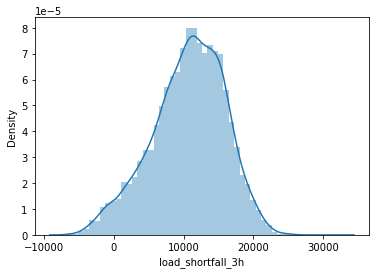

In [76]:
sns.distplot(dataframe['load_shortfall_3h'])

<b>We can deduce from the chart that</b>;
- Does not deviate from the normal distribution, has a gradual distribution for the indpendent variable observations
- Have appreciable symmetrical skewness.
- Show peakedness.

<b>Multivariate Analysis</b>

In [77]:
correlation = dataframe.corr()
correlation

,Year,Month,Day,Hour,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Year,1.000000,-0.000452,-0.001320,0.000226,-0.011580,0.062176,-0.191407,0.054423,0.041900,0.025770,-0.018802,0.130914,-0.024476,-0.045667,-0.172568,-0.129145,0.011233,0.015695,-0.093252,-0.203106,-0.016533,-0.066386,-0.029817,-0.068520,0.020083,-0.098703,-0.020128,-0.046348,-0.004901,-0.050296,0.011170,0.141572,-0.234904,0.291251,0.015075,0.073951,0.122811,-0.151119,-0.029345,0.133934,-0.038048,-0.004701,0.003475,-0.025867,0.006234,0.063752,0.057319,-0.078447,-0.003341,-0.002204,0.131324
Month,-0.000452,1.000000,0.009592,0.000226,-0.235733,-0.109152,-0.177464,-0.233550,-0.087993,-0.063884,-0.136215,-0.096566,-0.147646,-0.165337,-0.071538,0.056530,-0.093097,-0.128386,-0.026419,-0.006831,-0.064958,-0.065490,-0.028947,-0.047824,-0.075091,-0.049005,-0.019678,0.059657,0.025324,0.046454,0.096098,0.109583,0.201311,0.247235,0.213760,0.214722,0.151826,0.224983,0.188156,0.213168,0.235534,0.202973,0.216035,0.208299,0.246352,0.184902,0.281461,0.221140,0.196907,0.178560,0.199048
Day,-0.001320,0.009592,1.000000,0.000214,-0.038722,-0.025827,0.057068,-0.009837,0.024934,0.016621,0.028425,-0.029415,-0.014268,0.024520,-0.004093,-0.021121,-0.003460,-0.023455,0.019663,0.008805,-0.004364,-0.047709,0.013760,0.003701,0.006654,-0.019068,-0.019952,-0.009348,-0.013184,0.008041,0.000076,-0.035577,-0.012772,-0.018110,-0.002150,-0.001224,-0.007174,-0.010118,0.049875,0.001022,-0.004527,0.004298,-0.003606,0.003607,0.005728,-0.002441,0.005398,-0.006847,0.009484,0.026238,0.092116
Hour,0.000226,0.000226,0.000214,1.000000,0.188118,-0.171907,0.039779,0.212418,-0.432221,-0.313369,-0.022151,0.206420,-0.017705,0.143949,0.191400,-0.181017,0.025622,0.269876,0.009500,-0.061268,0.015112,0.020975,-0.007980,0.009426,0.063648,0.003138,-0.001179,-0.045798,0.000702,-0.013322,0.018749,-0.025935,0.246514,-0.012044,0.256799,0.272844,0.026548,0.326059,-0.349312,0.282792,0.193930,0.283683,0.218456,0.271493,0.264344,0.238515,0.249177,0.352601,0.284658,0.258025,0.139285
Madrid_wind_speed,-0.011580,-0.235733,-0.038722,0.188118,1.000000,0.112011,0.247761,0.524549,-0.114347,-0.116172,0.225566,0.382617,0.185177,0.272466,0.272295,-0.083599,0.245055,0.429858,0.062114,-0.185815,0.112461,0.062032,0.009569,0.004014,0.170672,-0.013045,0.018883,-0.178500,-0.094986,-0.278214,-0.119056,-0.240147,0.027694,-0.153231,0.109921,0.106533,-0.228350,0.059882,-0.293759,0.100117,0.038752,0.064625,0.051990,0.051152,0.036799,0.059285,0.020677,0.077828,0.078077,0.064200,-0.150981
Valencia_wind_deg,0.062176,-0.109152,-0.025827,-0.171907,0.112011,1.000000,0.174800,0.270834,0.276979,0.291152,0.143733,0.071520,0.082175,0.113183,0.020037,0.167319,0.116475,-0.038692,-0.002750,0.227690,-0.000324,0.057372,0.021683,-0.021004,-0.014082,0.008190,0.016777,-0.010123,-0.024319,-0.095854,-0.014487,-0.133859,-0.367882,-0.143871,-0.280860,-0.282348,-0.190282,-0.377259,-0.132809,-0.279917,-0.294823,-0.368756,-0.294921,-0.301837,-0.310330,-0.277645,-0.308790,-0.346848,-0.364499,-0.345021,-0.188674
Bilbao_rain_1h,-0.191407,-0.177464,0.057068,0.039779,0.247761,0.174800,1.000000,0.240118,0.063048,0.098192,0.361385,0.075120,0.074137,0.255858,0.070787,-0.020902,0.127963,0.118810,0.060390,0.067979,0.083222,0.096260,0.051968

The <b>load_shortfall_3h</b> variable is target. So, we should check how each attribute correlates with the target variable. We can do it as follows:-

In [29]:
corrs = correlation['load_shortfall_3h'].sort_values(ascending=False)
corrs

load_shortfall_3h       1.000000
Valencia_temp_min       0.201863
Month                   0.199048
Barcelona_temp_min      0.195984
Madrid_temp             0.186036
Barcelona_temp          0.182673
Madrid_temp_max         0.182548
Bilbao_temp_max         0.180934
Bilbao_temp             0.176411
Madrid_temp_min         0.174744
Seville_temp_min        0.174718
Valencia_temp           0.173225
Bilbao_temp_min         0.172920
Barcelona_temp_max      0.164734
Seville_temp            0.159343
Bilbao_weather_id       0.145875
Valencia_temp_max       0.144270
Hour                    0.139285
Year                    0.131324
Seville_temp_max        0.109834
Madrid_pressure         0.092638
Day                     0.092116
Valencia_pressure       0.090405
Barcelona_weather_id    0.063868
Seville_weather_id      0.061104
Valencia_humidity       0.043140
Bilbao_pressure         0.039052
Madrid_weather_id       0.030868
Valencia_snow_3h       -0.021633
Barcelona_rain_3h      -0.024720
Madrid_rai

<b>Heat Map<b>

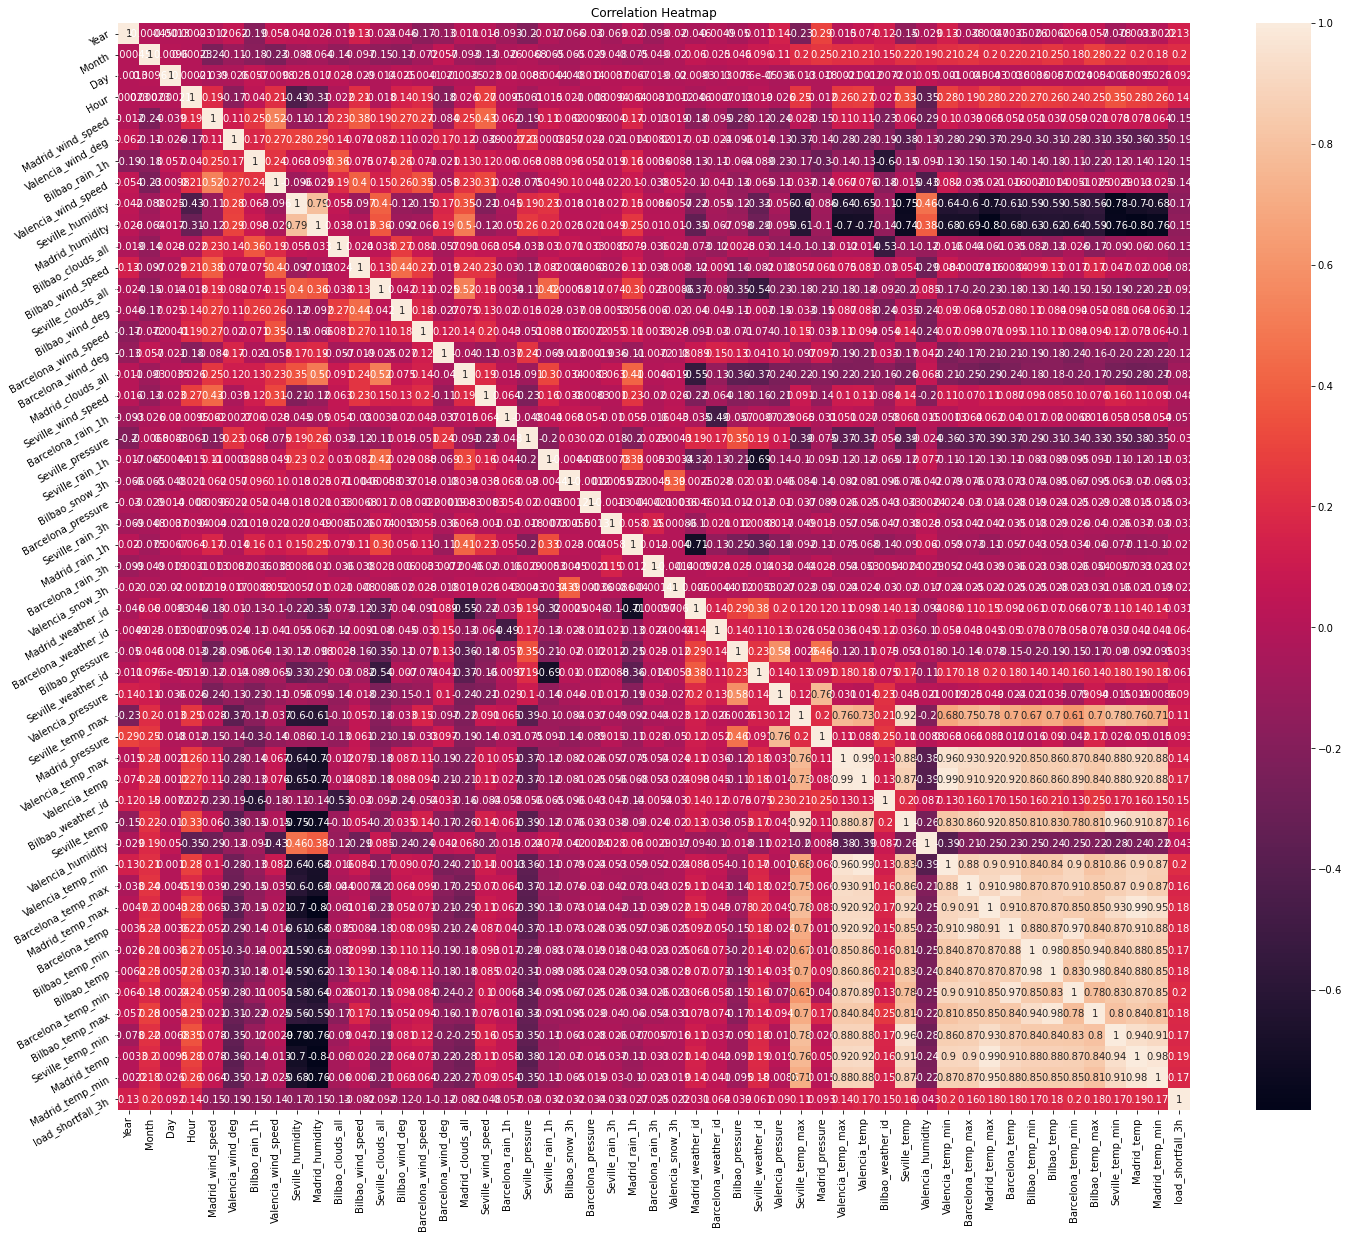

In [79]:
plt.figure(figsize=(24,20))
plt.title('Correlation Heatmap')
heatmap = sns.heatmap(correlation, annot=True, linecolor='white')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=30)           
plt.show()

<b>Interpretation From the above correlation heat map, we can conclude that :- (Using Pearson Correlation Coefficient) </b>

- The correlation coefficient ranges from -1 to +1.
<br><br>
- When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is no variable which has strong positive correlation with target variable.
<br><br>
- When it is clsoe to -1, it means that there is a strong negative correlation. So, we can see that there is no variable which has strong negative correlation with target variable.
<br><br>
- When it is close to 0, it means that there is no linear correlation. So, there is no correlation between the target and some of the independent variables, they are; <b>Madrid_pressure, Barcelona_weather_id, Seville_weather_id, Valencia_humidity, Bilbao_pressure, Madrid_weather_id, Barcelona_pressure, Seville_wind_speed, Bilbao_wind_speed, Madrid_clouds_all</b> and <b>Seville_clouds_all</b> 
<br>   <br>
- We can see that <b>Valencia_temp_min, Barcelona_temp_min, Madrid_temp, Barcelona_temp, Madrid_temp_max, Bilbao_temp_max , Bilbao_temp, Madrid_temp_min, Seville_temp_min, Valencia_temp, Bilbao_temp_min, Barcelona_temp_max, Seville_temp, Bilbao_weather_id, Valencia_temp_max </b> and <b>Seville_temp_max</b> have weak positive correlation with target variable
<br><br>
- We can also see that <b>Barcelona_wind_speed, Barcelona_wind_deg, Bilbao_wind_deg, Bilbao_clouds_all, Valencia_wind_speed, Madrid_humidity, Madrid_wind_speed</b> and <b>Seville_humidity</b> have weak negative correlation with target variable.

sns.set_style("whitegrid");
sns.pairplot(dataframe, hue="load_shortfall_3h");
plt.show();

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [239]:
dfm = dataframe.copy()

In [240]:
dfm = dfm.drop(['Unnamed: 0', 'time'], axis=1)

KeyError: "['Unnamed: 0' 'time'] not found in axis"

In [241]:
dfm = dfm.drop(['Madrid_pressure', 'Barcelona_weather_id', 'Seville_weather_id', 'Valencia_humidity', 'Bilbao_pressure', 'Madrid_weather_id', 'Barcelona_pressure', 'Seville_wind_speed', 'Bilbao_wind_speed', 'Madrid_clouds_all', 'Seville_clouds_all'], axis=1)

In [242]:
dfm.shape

(11683, 40)

In [439]:
from statsmodels.formula.api import ols

# Model DataFrame with all of the columns:

y_name = dfm[:len(df_train)][['load_shortfall_3h']]
X_names = dfm[:len(df_train)].drop('load_shortfall_3h', axis=1)


In [440]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_names)

In [441]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'load_shortfall_3h']
for col in column_titles:
    #p_val = round(pearsonr(dataframe[col], dataframe['load_shortfall_3h'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col]}

df_cp = pd.DataFrame(dict_cp).T
df_cp

,Correlation_Coefficient
Valencia_temp_min,0.201863
Month,0.199048
Barcelona_temp_min,0.195984
Madrid_temp,0.186036
Barcelona_temp,0.182673
Madrid_temp_max,0.182548
Bilbao_temp_max,0.180934
Bilbao_temp,0.176411
Madrid_temp_min,0.174744
Seville_temp_min,0.174718


Model prediction of Loan Size

In [442]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

<b>Preprocess data</b><br>
First we need to make sure that all models are trained and tested on the same data.

<b>Fit models</b><br>
Next we instantiate and fit our models

In [470]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y_name,
                                                    test_size=0.20,
                                                    random_state=35)

In [471]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

prediction1 = model_lr.predict(X_test)

In [472]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, y_train)

prediction2 = model_RFR.predict(X_test)

In [473]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train)

prediction3 = model_lasso.predict(X_test)

In [474]:
b0 = float(lasso.intercept_)

In [475]:
lasso_coefs = pd.DataFrame(model_lasso.coef_, X_names.columns, columns=['Coefficient'])

In [476]:
print("Intercept:",  float(intercept))

Intercept: 10672.018838586106


In [477]:
lasso_coefs

,Coefficient
Year,223.868260
Month,528.186008
Day,589.107677
Hour,566.901719
Madrid_wind_speed,-342.059859
Valencia_wind_deg,-279.668357
Bilbao_rain_1h,-257.019105
Valencia_wind_speed,-330.690221
Seville_humidity,-497.550657
Madrid_humidity,189.285480


In [478]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=0.1)

model_ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [479]:
prediction4 = model_ridge.predict(X_test)

In [480]:
ridge_coefs = pd.DataFrame(model_ridge.coef_)
ridge_coefs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,224.329093,526.23503,590.045034,567.370489,-342.231943,-277.404199,-256.072971,-329.13609,-499.323221,191.258158,-141.45227,-307.140374,-137.384367,-177.571092,-208.529141,225.841263,135.464856,267.418691,-92.308878,86.43481,-78.431364,-116.094291,331.138834,-1123.345561,-1562.536749,-1840.44226,108.321197,2226.006289,3187.203873,-660.564061,-2329.11734,3082.627158,3975.328298,-7315.509843,-1230.744699,3180.210657,-2144.68011,4997.332673,-2079.69858


In [460]:
#y_name = dfm[:len(df_train)][['load_shortfall_3h']]
X_subset = dfm[:len(df_train)].drop(['Madrid_humidity', 'Barcelona_rain_3h', 'Valencia_snow_3h', 'Bilbao_weather_id', 'load_shortfall_3h'], axis=1)
#X_subset = dfm.drop(['Madrid_humidity', 'Barcelona_rain_3h', 'Valencia_snow_3h', 'Bilbao_weather_id'], axis=1)
X_subset_scaled = scaler.fit_transform(X_subset)

In [461]:
# Train-test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_subset,
                                                    y_name,
                                                    test_size=0.20,
                                                    random_state=42,
                                                    shuffle=False)

In [462]:
model_lr2 = LinearRegression()
model_lr2.fit(X_train2, y_train2)

prediction11 = model_lr2.predict(X_test2)

In [463]:
from sklearn.ensemble import RandomForestRegressor

model_RFR2 = RandomForestRegressor()
model_RFR2.fit(X_train2, y_train2)

prediction22 = model_RFR2.predict(X_test2)

In [464]:
from sklearn.linear_model import Lasso

model_lasso2 = Lasso(alpha=0.01)
model_lasso2.fit(X_train2, y_train)

prediction33 = model_lasso2.predict(X_test2)

ValueError: Found input variables with inconsistent numbers of samples: [7010, 6134]

In [ ]:
from sklearn.linear_model import Ridge

model_ridge2 = Ridge(alpha=0.1)
model_ridge2.fit(X_train2, y_train2)

prediction44 = model_ridge2.predict(X_test2)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

In [481]:
from sklearn import metrics
import math

In [482]:
def MSE(y_test, y_predict):
    return metrics.mean_squared_error(y_test, y_predict)

In [483]:
print("Linear Regression: ", MSE(y_test, prediction1))
print("Random Forest: ", MSE(y_test, prediction2))
print("Lasso: ", MSE(y_test, prediction3))
print("Ridge: ", MSE(y_test, prediction4))

Linear Regression:  22611182.899929833
Random Forest:  10201384.188437767
Lasso:  22632547.15365229
Ridge:  22613072.107866764


In [484]:
def MSE2(y_test2, y_predict):
    return metrics.mean_squared_error(y_test2, y_predict)

In [485]:
print("Linear Regression2: ", MSE2(y_test2, prediction11))
print("Random Forest2: ", MSE2(y_test2, prediction22))
print("Lasso: ", MSE2(y_test2, prediction33))
print("Ridge: ", MSE2(y_test2, prediction44))

Linear Regression2:  21986031.522811234
Random Forest2:  18397006.474265125
Lasso:  27614797.01481528
Ridge:  21991602.146797165


In [486]:
def RMSE(y_test, y_predict):
    return math.sqrt(metrics.mean_squared_error(y_test, y_predict))

In [487]:
print("Linear Regression: ", RMSE(y_test, prediction1))
print("Random Forest: ", RMSE(y_test, prediction2))
print("Lasso: ", RMSE(y_test, prediction3))
print("Ridge: ", RMSE(y_test, prediction4))

Linear Regression:  4755.121754480092
Random Forest:  3193.9605802886435
Lasso:  4757.367670640171
Ridge:  4755.32040012729


In [465]:
def RMSE2(y_test, y_predict):
    return math.sqrt(metrics.mean_squared_error(y_test2, y_predict))

In [466]:
print("Linear Regression2: ", RMSE(y_test2, prediction11))
print("Random Forest2: ", RMSE(y_test2, prediction22))
print("Lasso2: ", RMSE(y_test2, prediction33))
print("Ridge2: ", RMSE(y_test2, prediction44))

Linear Regression2:  4688.9264787167685
Random Forest2:  4289.173169069433
Lasso2:  5254.978307739745
Ridge2:  4689.520460217352


In [488]:
from sklearn.metrics import r2_score

In [489]:
print("Linear Regression: ",r2_score(y_test, prediction1))
print("Random Forest: ", r2_score(y_test, prediction2))
print("Lasso: ", r2_score(y_test, prediction3))
print("Ridge: ", r2_score(y_test, prediction4))

Linear Regression:  0.1596096854149992
Random Forest:  0.6208449374247345
Lasso:  0.15881563974360935
Ridge:  0.15953946918352369


In [469]:
print("Linear Regression2: ",r2_score(y_test2, prediction11))
print("Random Forest2: ", r2_score(y_test2, prediction22))
print("Lasso2: ", r2_score(y_test2, prediction33))
print("Ridge2: ", r2_score(y_test2, prediction44))

Linear Regression2:  0.07552046991676031
Random Forest2:  0.22643357066867953
Lasso2:  -0.16116064607262004
Ridge2:  0.0752862335635811


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

SUMBISSION

In [410]:
X_train = dfm[:len(df_train)].drop('load_shortfall_3h', axis=1)
X_test = dfm[len(df_train):].drop('load_shortfall_3h', axis=1)

In [411]:
X_train2 = dfm[:len(df_train)].drop(['Madrid_humidity', 'Barcelona_rain_3h', 'Valencia_snow_3h', 'Bilbao_weather_id', 'load_shortfall_3h'], axis=1)
X_test2 = dfm[len(df_train):].drop(['Madrid_humidity', 'Barcelona_rain_3h', 'Valencia_snow_3h', 'Bilbao_weather_id', 'load_shortfall_3h'], axis=1)

In [182]:
model_lr.fit(X_train, y_name)

prediction1 = model_lr.predict(X_test)

In [183]:
model_RFR.fit(X_train, y_name)

prediction2 = model_RFR.predict(X_test)

In [412]:
model_RFR2.fit(X_train2, y_name)

prediction22 = model_RFR2.predict(X_test2)

import statsmodels.api as sm

model_RFR = sm.OLS(y_name, X_names)
fitted = model_RFR.fit()

print(fitted.summary())

In [187]:
daf=pd.DataFrame(prediction2, columns=['load_shortfall_3h'])
daf.tail()

,load_shortfall_3h
2915,14140.336667
2916,12834.843333
2917,12917.583333
2918,14590.453333
2919,16946.143333


In [414]:
daf2=pd.DataFrame(prediction22, columns=['load_shortfall_3h'])
daf2.tail()

,load_shortfall_3h
2915,14747.296667
2916,11701.170000
2917,11726.520000
2918,12808.883333
2919,16025.680000


In [188]:
output = pd.DataFrame({'time':df_test['time']})
submission = output.join(daf)
submission.to_csv("submission.csv", index=False)

In [189]:
submission

,time,load_shortfall_3h
0,2018-01-01 00:00:00,10568.556667
1,2018-01-01 03:00:00,8716.003333
2,2018-01-01 06:00:00,8444.416667
3,2018-01-01 09:00:00,10168.313333
4,2018-01-01 12:00:00,12879.596667
...,...,...
2915,2018-12-31 09:00:00,14140.336667
2916,2018-12-31 12:00:00,12834.843333
2917,2018-12-31 15:00:00,12917.583333
2918,2018-12-31 18:00:00,14590.453333
